In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [5]:
def plot_outliers(dataset):
    fig, axs = plt.subplots(2, figsize=(5, 5))
    sns.boxplot(dataset['age'], ax=axs[0])
    sns.boxplot(dataset['height'], ax=axs[1])
    plt.tight_layout()
    plt.show()

In [16]:
def plot_distribution(dataset):
    sns.histplot(dataset['height'], kde=True)
    plt.title("Distribution of Height")
    plt.show()

In [17]:
def plot_relationship(dataset):
    sns.pairplot(dataset, x_vars=['age'], y_vars='height', height=4, aspect=1, kind='scatter')
    plt.title("Relationship between Age and Height")
    plt.show()

In [18]:
def plot_heatmap(dataset):
    sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


In [19]:
# Model training
def train_model(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

In [20]:
# Display model coefficients
def display_model_coefficients(model):
    print(f'Intercept: {model.intercept_}')
    print(f'Coefficient: {model.coef_}')

In [21]:
# Plot line of best fit
def plot_best_fit(x_train, y_train, model):
    plt.scatter(x_train, y_train, color='blue', label='Data points')
    plt.plot(x_train, model.predict(x_train), color='red', label='Best fit line')
    plt.legend()
    plt.title("Line of Best Fit")
    plt.xlabel("Age")
    plt.ylabel("Height")
    plt.show()

In [29]:
# Main function
def main():
    # Load dataset
    dataset = load_data("height.csv")
    print("Dataset Head:")
    print(dataset.head())

    # Plotting
    plot_outliers(dataset)
    plot_distribution(dataset)
    plot_relationship(dataset)
    plot_heatmap(dataset)

    # Prepare data for modeling
    x = dataset[['age']]
    y = dataset['height']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

    # Train the model
    model = train_model(x_train, y_train)

    # Display model coefficients
    display_model_coefficients(model)
    print(f'Regression Equation: height = {model.intercept_} + {model.coef_[0]} * AGE')

    # Plot line of best fit
    plot_best_fit(x_train, y_train, model)

    # Predictions
    y_pred_slr = model.predict(x_test)
    print("Prediction for test set:")
    print(y_pred_slr)

    # Actual vs Predicted
    slr_diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred_slr})
    print("Actual vs Predicted:")
    print(slr_diff)

    # Sample predictions
    sample_ages = pd.DataFrame({'age': [23, 30, 19]})  # Convert the list of ages into a DataFrame
    predictions = model.predict(sample_ages)
    
    for age, pred in zip(sample_ages['age'], predictions):
        print(f"Predicted height for age {age}: {pred}")

Dataset Head:
   age  height  weight
0   61    1.85  109.30
1   60    1.71   79.02
2   60    1.55   74.70
3   60    1.46   35.90
4   60    1.58   97.10


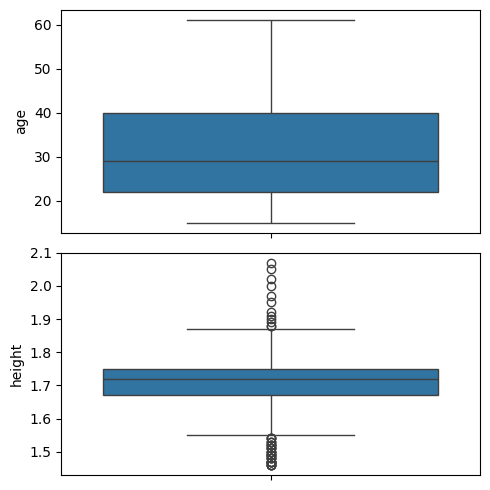

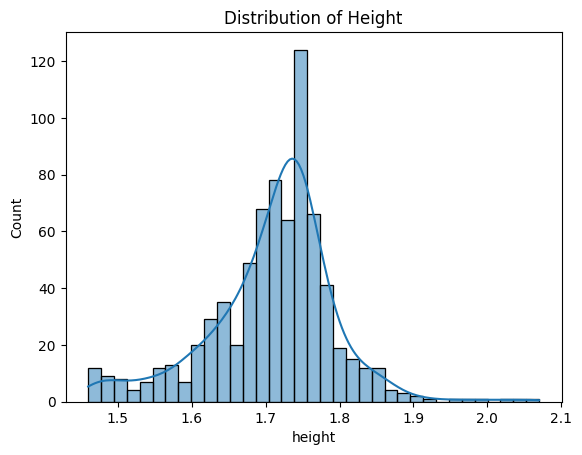

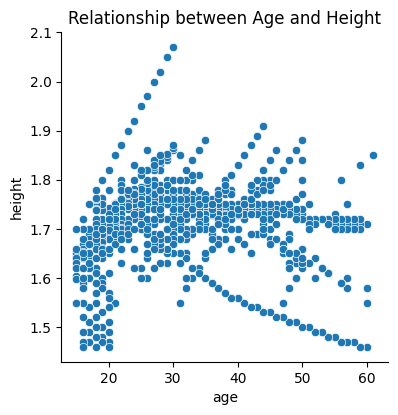

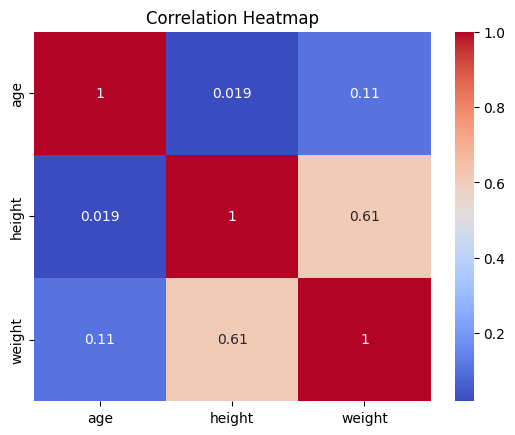

Intercept: 1.6967244175596312
Coefficient: [0.00035425]
Regression Equation: height = 1.6967244175596312 + 0.00035424890859436233 * AGE


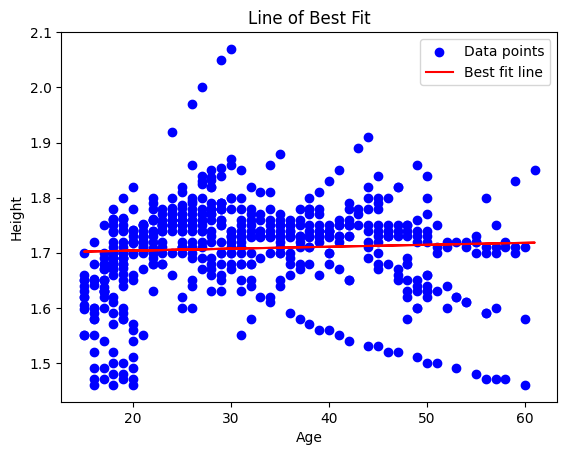

Prediction for test set:
[1.70487214 1.70416364 1.70735188 1.7031009  1.71372837 1.7038094
 1.7023924  1.71054012 1.71018588 1.70451789 1.71018588 1.70487214
 1.70416364 1.70735188 1.71231137 1.70274665 1.71337412 1.71691661
 1.7031009  1.7031009  1.70345515 1.70593489 1.70416364 1.70770613
 1.71408261 1.70699764 1.70735188 1.71372837 1.70735188 1.70593489
 1.70628914 1.70451789 1.71514536 1.70451789 1.71479111 1.70699764
 1.7023924  1.70487214 1.71124862 1.71301987 1.70558064 1.70806038
 1.71301987 1.70345515 1.70416364 1.70451789 1.70628914 1.70274665
 1.70699764 1.70983163 1.71797935 1.71195712 1.70983163 1.71195712
 1.71018588 1.70558064 1.70628914 1.70876888 1.70806038 1.7038094
 1.70806038 1.71691661 1.70983163 1.70345515 1.70416364 1.70416364
 1.70522639 1.70735188 1.70628914 1.71337412 1.70841463 1.70664339
 1.70416364 1.70522639 1.71727085 1.70451789 1.70487214 1.71160287
 1.71124862 1.70558064 1.71195712 1.70735188 1.7038094  1.7038094
 1.7023924  1.70806038 1.71089437 1.7048

In [30]:
# Execute main function
if __name__ == "__main__":
    main()